# General REDCOMETS test
- It can't handle multivariate time series (the ones that got mutliple channels)

In [3]:
import sys, os
sys.path.append(os.path.abspath('..'))

from helpers import *
from Redcomets import REDCOMETS
from aeon.datasets import load_unit_test
from aeon.datasets import load_gunpoint
from aeon.datasets import load_basic_motions

## Unit Test 

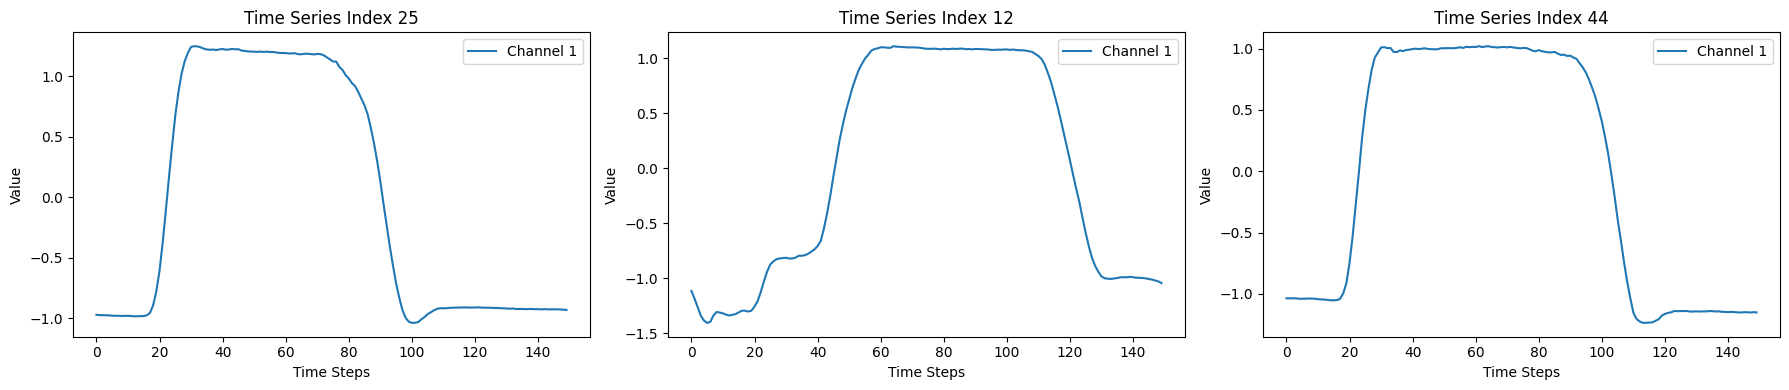

In [4]:
# Load Data
Xtrain, ytrain = load_gunpoint(split="TRAIN")
#Xtrain, ytrain = load_basic_motions(split="TRAIN")
#Xtrain, ytrain = load_unit_test(split="train")


Xtest, ytest = load_gunpoint(split="TEST")
#Xtest, ytest = load_basic_motions(split="TEST")
#Xtest, ytest = load_unit_test(split="test")

#Plot them
plot_random_time_series(Xtrain, n = 3)

In [5]:
clf = REDCOMETS(variant = 3)  
clf.fit(Xtrain, ytrain)  

y_pred = clf.predict(Xtest)  

In [6]:
clf.sax_clfs

[(RandomForestClassifier(n_jobs=1), np.float64(0.9436363636363637)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9618181818181819)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.8854545454545455)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9254545454545454)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9618181818181817)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9418181818181818)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.8872727272727273))]

In [7]:
clf.get_ensemble_proximities(Xtrain, group = "all")

array([[1.        , 0.40307376, 0.12232482, ..., 0.24774043, 0.05200851,
        0.15423262],
       [0.40307376, 1.        , 0.11567801, ..., 0.45807801, 0.0832539 ,
        0.16107801],
       [0.12232482, 0.11567801, 1.        , ..., 0.1884    , 0.38051773,
        0.06093475],
       ...,
       [0.24774043, 0.45807801, 0.1884    , ..., 1.        , 0.09846099,
        0.08403404],
       [0.05200851, 0.0832539 , 0.38051773, ..., 0.09846099, 1.        ,
        0.04253617],
       [0.15423262, 0.16107801, 0.06093475, ..., 0.08403404, 0.04253617,
        1.        ]])

## Static Variable Testing

In [8]:
#Generate random static variables to test algorithm
Xstatic = np.random.rand(Xtrain.shape[0], 45)
Xstatic_test = np.random.rand(Xtest.shape[0], 45)

#To test if None works
# Xstatic = None
# Xstatic_test = None

In [9]:
Xtrain.shape

(50, 1, 150)

In [13]:
rc = REDCOMETS(variant = 3, static = Xstatic)  
rc.fit(Xtrain, ytrain)  

10{"stdout":"[{\"variableName\": \"ID_TO_MEANING\", \"type\": \"dictionary\", \"supportedEngines\": [\"pandas\"], \"isLocalVariable\": true, \"rawType\": \"builtins.dict\"}, {\"variableName\": \"NULL\", \"type\": \"unknown\", \"supportedEngines\": [\"pandas\"], \"isLocalVariable\": true, \"rawType\": \"_pydevd_bundle.pydevd_constants.Null\"}]\n","stderr":"","mime":[]}
10{"stdout":"[{\"variableName\": \"ID_TO_MEANING\", \"type\": \"dictionary\", \"supportedEngines\": [\"pandas\"], \"isLocalVariable\": true, \"rawType\": \"builtins.dict\"}, {\"variableName\": \"NULL\", \"type\": \"unknown\", \"supportedEngines\": [\"pandas\"], \"isLocalVariable\": true, \"rawType\": \"_pydevd_bundle.pydevd_constants.Null\"}]\n","stderr":"","mime":[]}


REDCOMETS(static=array([[0.48623898, 0.56296733, 0.51856615, ..., 0.77008336, 0.93638391,
        0.57068475],
       [0.02101305, 0.21153017, 0.47802477, ..., 0.53313665, 0.35514879,
        0.54185682],
       [0.87965254, 0.31193309, 0.54801725, ..., 0.52588269, 0.914175  ,
        0.96664792],
       ...,
       [0.72288665, 0.41187115, 0.55387502, ..., 0.44240144, 0.43497154,
        0.2072337 ],
       [0.71473775, 0.57056583, 0.7471959 , ..., 0.33565551, 0.760833  ,
        0.25416999],
       [0.01719193, 0.78654764, 0.43413803, ..., 0.931736  , 0.23351151,
        0.05579317]]))

In [14]:
static_prox = rc.get_ensemble_proximities(Xtrain, group = "all")
static_prox

array([[1.        , 0.37377066, 0.1159556 , ..., 0.29548156, 0.09684193,
        0.24703221],
       [0.37377066, 1.        , 0.12855116, ..., 0.40676014, 0.1555767 ,
        0.2751327 ],
       [0.1159556 , 0.12855116, 1.        , ..., 0.18491571, 0.35173427,
        0.07881656],
       ...,
       [0.29548156, 0.40676014, 0.18491571, ..., 1.        , 0.15912369,
        0.19349691],
       [0.09684193, 0.1555767 , 0.35173427, ..., 0.15912369, 1.        ,
        0.10467868],
       [0.24703221, 0.2751327 , 0.07881656, ..., 0.19349691, 0.10467868,
        1.        ]])

In [15]:
rc = REDCOMETS(variant = 3, static = None)  
rc.fit(Xtrain, ytrain)  

no_static_prox = rc.get_ensemble_proximities(Xtrain, group = "all")

#Compare the two proximities
print(f"Shape of Xtrain: ", Xtrain.shape)
print("Shape of static_prox: ", static_prox.shape)
print("Shape of no_static_prox: ", no_static_prox.shape)
static_prox == no_static_prox

Shape of Xtrain:  (50, 1, 150)
Shape of static_prox:  (50, 50)
Shape of no_static_prox:  (50, 50)


array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True]])